[[592 575]
 [659 576]]
[[592 575]
 [659 576]]


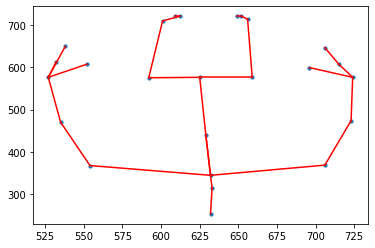

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp
from PIL import Image

path = "000031/P35_02_11_0"
f = open("/home/liweijie/SLR_dataset/xf500_body_color_txt/"+path+"_body.txt","r")
video_path = "/home/liweijie/SLR_dataset/S500_color_video/"+path+"_color"
image_list = os.listdir(video_path)
image_list.sort()
image_list = [osp.join(video_path,x) for x in image_list]
content = f.readlines()

def view_invariant_transform(mat):
    '''
      @params mat: T J D
    '''
    index1 = 12
    index2 = 16
    new_mat = np.zeros(mat.shape)
    for i in range(mat.shape[0]):
        delta_x,delta_y = mat[i,index2,:]-mat[i,index1,:]
        center_x,center_y = 0.5*(mat[i,index2,:]+mat[i,index1,:])
        length = (delta_x*delta_x+delta_y*delta_y)**0.5
        cos_theta = delta_x/length
        sin_theta = delta_y/length
        T = np.array([
            [cos_theta,-sin_theta],
            [-sin_theta,-cos_theta]
        ])
        t = np.array([center_x,center_y])
        # 对一帧中所有坐标进行具有视角不变性的变换
        # x'=Tx
        # origin_coord: J D
        origin_coord = mat[i,:,:]-t
        new_coord = np.matmul(T,origin_coord.transpose())
        new_coord = new_coord.transpose()
        new_mat[i,:,:] = new_coord
    return new_mat

def content_to_mat(content):
    mat = []
    for record in content:
        skeleton = record.rstrip("\n").rstrip("  ").split()
        skeleton = [int(x) for x in skeleton]
        skeleton = np.array(skeleton)
        shape = skeleton.size
        skeleton = np.reshape(skeleton,[shape//2,2])
        mat.append(skeleton)
    mat = np.array(mat)
    return mat        

mat = content_to_mat(content)

links = \
[
    [2,3],
    [3,20],
    [20,4],
    [20,8],
    [20,1],
    [4,5],
    [5,6],
    [6,22],
    [6,7],
    [6,21],
    [8,9],
    [9,10],
    [10,24],
    [10,11],
    [11,23],
    [20,1],
    [1,0],
    [0,12],
    [0,16],
    [12,13],
    [13,14],
    [14,15],
    [16,17],
    [17,18],
    [18,19]
]

def plot_skeleton(skeleton,i):
    x = skeleton[:,0]
    y = skeleton[:,1]
#     plt.subplot(2,2,i)
#     ax = plt.gca()
#     ax.yaxis.set_ticks_position('right')  #将y轴的位置设置在右边
#     ax.invert_yaxis()  #y轴反向
    plot_links(skeleton,links)
    plt.scatter(x,y,s=10)
    
    
def plot_image(image_name,i):
    plt.subplot(4,4,i)
    image = Image.open(image_name)
    plt.imshow(image)


# plot_skeleton(mat[16],0)
#for count,i in enumerate(range(16,20,1)):
#     skeleton = mat[i]
#     image_name = image_list[i]
# #     plot_image(image_name,count+1)
#     plot_skeleton(skeleton,count+1)
# plt.show()

print(mat[19,[12,16]])

# mat = view_invariant_transform(mat)
plot_skeleton(mat[19],0)
# # mat = random_jitter(mat)
# for count,i in enumerate(range(19,23,1)):
#     skeleton = mat[i]
#     plot_skeleton(skeleton,count+1)
# plt.show()

#fig.savefig('skeleton.pdf', bbox_inches='tight')

# print(mat.shape)
print(mat[19,[12,16]])

In [51]:
def plot_links(skeleton,links):
        skeleton = np.transpose(skeleton)
        for link in links:
            i,j = link
#             x1 = skeleton[i,0]
#             y1 = skeleton[i,1]
#             x2 = skeleton[j,0]
#             y2 = skeleton[j,1]
            plt.plot(skeleton[0,[i,j]],skeleton[1,[i,j]],color='r')

In [9]:
def random_jitter(mat):
    # input: T J D
    jitter_amp = 10
    delta  = np.random.randint(0,jitter_amp,mat.shape)
    mat = mat+delta
    return mat

def random_shift(mat):
    shift_amp = 20
    xshift = np.random.randint(-shift_amp,shift_amp)
    yshift = np.random.randint(-shift_amp,shift_amp)
    mat[:,:,0] = mat[:,:,0]+xshift
    mat[:,:,1] = mat[:,:,1]+yshift
    return mat

def random_augmentation(mat):
    choice = np.random.randint(0,2,4)
    if choice[0]==1:
        mat = random_jitter(mat)
    elif choice[1]==1:
        mat = random_shift(mat)
    return mat



In [3]:
plt.show()

In [4]:
import os
import os.path as osp
import cv2
path = "/media/liweijie/代码和数据/datasets/SLR_dataset/S500_depth_video/000000/P01_01_00_0_depth"
imagename_list = os.listdir(path)
imagename_list.sort()
imagelist = []
for imagename in imagename_list:
    abs_imagename = osp.join(path,imagename)
    image = cv2.imread(abs_imagename)
    imagelist.append(image)


In [6]:
image.max(),image.min(),image.mean()

(228, 0, 67.95397718897405)

In [69]:
import torch
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])